<a href="https://colab.research.google.com/github/Andres8bit/Machine-Learning/blob/main/VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation, MaxPool2D, BatchNormalization, Dropout, ZeroPadding2D
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers
import numpy as np
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def normalize_images(items):
  temp = np.zeros(shape=(items.shape))
  mean = np.mean(items,axis=(0,1,2,3))
  std = np.std(items,axis=(0,1,2,3))
  temp =(items - mean) /(std +1e-7)
  return temp

In [3]:
def display_loss(model):
  loss = model.history['loss']
  val_loss = model.history['val_loss']

  plt.figure()
  plt.plot(model.epoch, loss, 'r',label='Training loss')
  plt.plot(model.epoch,val_loss,'bo',label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss Value')
  plt.ylim([0,1])
  plt.legend()

In [4]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train, y_valid) = y_train[5000:],y_train[:5000]

In [7]:
# Data Normalization:
x_train = normalize_images(x_train)
x_valid = normalize_images(x_valid)
x_test = normalize_images(x_test)

In [8]:
# One-Hot Encocding of lables:
y_train = np_utils.to_categorical(y_train,10)
y_valid = np_utils.to_categorical(y_valid,10)
y_test = np_utils.to_categorical(y_test,10)

In [9]:
# Data Augmentation:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=False
)

datagen.fit(x_train)

In [10]:
# VGG16 Architecture:
model = Sequential(name='VGG16')

# 1st Block :
  # 1st Convolutional Layer:
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same',input_shape=x_train.shape[1:]))
  # 2nd Convolutional Layer:
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # Max Pooling Layer:
model.add(MaxPool2D((2,2),strides=(2,2)))

# 2nd Block:
  # 1st Convolutional Layer:
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # 2nd Convolutional Layer:
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # Max Pooling Layer:
model.add(MaxPool2D((2,2),strides=(2,2)))

# 3rd Block:
  # 1st Convolutional Layer:
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # 2nd Convolutional Layer:
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # 3rd Convolutional Layer:
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # Max Pooling Layer:
model.add(MaxPool2D((2,2),strides=(2,2)))

# 4th Block:
  # 1st Convolutional Layer:
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # 2nd Convolutional Layer:
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # 3rd Convolutional Layer:
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # Max Pooling Layer:
model.add(MaxPool2D((2,2),strides=(2,2)))

# 5th Block:
  # 1st Convolutional Layer:
model.add(Conv2D(filters=1024,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # 2nd Convolutional Layer:
model.add(Conv2D(filters=1024,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # 3rd Convolutional Layer:
model.add(Conv2D(filters=1024,kernel_size=(3,3),strides=(1,1),activation='relu',
                 padding='same'))
  # Max Pooling Layer:
model.add(MaxPool2D((2,2),strides=(2,2)))

# 6th Block Classifier:
  # Flatten Convolutional for Fully Connected Layers:
model.add(Flatten())
  # 1st Fully Connected/Dense Layer:
model.add(Dense(4096,activation='relu'))
  # Dropout Layer with 50% of droping wieght each epoch
model.add(Dropout(0.5))
  # 2nd Fully Connected/Denes Layer:
model.add(Dense(4096,activation='relu'))
  # Dropout Layer with 50% of droping wieght each epoch
model.add(Dropout(0.5))
  # Final Layer Softmax to Classify Inputs:
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         295168

In [11]:
batch_size = 128
epochs = 32

checkpointer = ModelCheckpoint(filepath='model.100epochs.hdfs',verbose=1,save_best_only=True)
optimizer = keras.optimizers.Adam(learning_rate=0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size)
                              ,callbacks=[checkpointer],steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs=epochs,verbose=2,validation_data=(x_valid,y_valid))


Epoch 1/32
351/351 - 82s - loss: 1.9828 - accuracy: 0.2169 - val_loss: 1.6669 - val_accuracy: 0.3254

Epoch 00001: val_loss improved from inf to 1.66686, saving model to model.100epochs.hdfs
INFO:tensorflow:Assets written to: model.100epochs.hdfs/assets
Epoch 2/32
351/351 - 32s - loss: 1.6093 - accuracy: 0.3629 - val_loss: 1.4585 - val_accuracy: 0.4500

Epoch 00002: val_loss improved from 1.66686 to 1.45849, saving model to model.100epochs.hdfs
INFO:tensorflow:Assets written to: model.100epochs.hdfs/assets
Epoch 3/32
351/351 - 32s - loss: 1.4045 - accuracy: 0.4754 - val_loss: 1.3168 - val_accuracy: 0.5280

Epoch 00003: val_loss improved from 1.45849 to 1.31684, saving model to model.100epochs.hdfs
INFO:tensorflow:Assets written to: model.100epochs.hdfs/assets
Epoch 4/32
351/351 - 32s - loss: 1.2126 - accuracy: 0.5564 - val_loss: 1.0633 - val_accuracy: 0.6234

Epoch 00004: val_loss improved from 1.31684 to 1.06331, saving model to model.100epochs.hdfs
INFO:tensorflow:Assets written to: 

In [15]:
scores = model.evaluate(x_test,y_test,batch_size=128,verbose=1)

79/79 [==============================] - 2s 23ms/step - loss: 0.7524 - accuracy: 0.8126


In [16]:
print('\n Test Set Accuracy:: %.3f'%(scores[1]*100))


 Test Set Accuracy:: 81.260


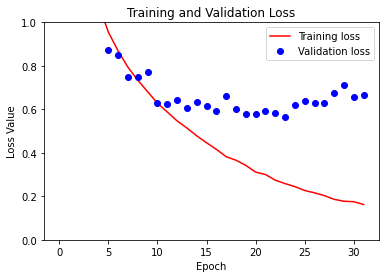

In [23]:
display_loss(history)